Bài 1: 

a) Tìm các công thức sai phân bậc cao hơn để xấp xỉ đạo hàm cấp 2 $f”(x)$ sử dụng công
thức Taylor như trong tuần 2.

b) Code Python vẽ hình.


In [10]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

Bài 1: 

Khai triển Taylor của $f(x + dx)$ quanh $dx$:
$$
f(x+dx)=\sum_{n=0}^\infty \frac{f^{(n)}(x)}{n!}dx^{n}  
$$
Xét 
$$
\begin{align}
\dotsc \\
a_n ~ f(x + n dx) & \ = \ a_n ~ \left[ ~  f(x) +  f^{'} (x) n dx +  \frac{1}{2!}  f^{''} (x) n^2 dx^n   + \dotsc  ~ \right] \\
\dotsc \\
a_1 ~ f(x + dx) & \ = \ a_1 ~ \left[ ~  f(x) +  f^{'} (x) dx +  \frac{1}{2!}  f^{''} (x) dx^2   + \dotsc  ~ \right] \\
b ~ f(x) & \  = \ b ~ \left[ ~  f(x)  ~ \right] \\
c_1 ~ f(x - dx) & \ = \ c ~ \left[ ~  f(x) -  f^{'} (x) dx +  \frac{1}{2!}  f^{''} (x) dx^2   - \dotsc  ~ \right] \\
\dotsc \\
c_n ~ f(x - n dx) & \ = \ c_n ~ \left[ ~  f(x) -  f^{'} (x) n dx +  \frac{1}{2!}  f^{''} (x) n^2 dx^n   - \dotsc  ~ \right] \\
\dotsc \\
\end{align}
$$


In [11]:
# Định nghĩa hàm tính các hệ số cho công thức sai phân trung tâm tính đạo hàm riêng cấp 2
# Kết quả trả về là mảng [a_n, ..., a_1, b, c_1, ..., c_n]

def central_difference_coefficients(nop, n):
    m = np.zeros((nop, nop))   # Khoi tao ma tran 0 co nop x nop          
    for i in range(nop):
        for j in range(nop):
            dx = j - nop // 2
            m[i, j] = dx ** i
    
    s = np.zeros(nop)
    s[n] = math.factorial(n)
    oper = np.linalg.solve(m, s)
    return oper

Sử dụng hàm vừa định nghĩa tính hệ số cho công thức sai phân trung tâm với $ nop $ điểm

In [12]:
n = 2
print("Nhập nop: ")
nop = int(input())
print("Các hệ số của công thức sai phân trung tâm tính đạo hàm riêng cấp 2 với nop = %i là: " % nop)
oper = central_difference_coefficients(nop, n)
print(oper)

Nhập nop: 
7
Các hệ số của công thức sai phân trung tâm tính đạo hàm riêng cấp 2 với nop = 7 là: 
[ 0.01111111 -0.15        1.5        -2.72222222  1.5        -0.15
  0.01111111]


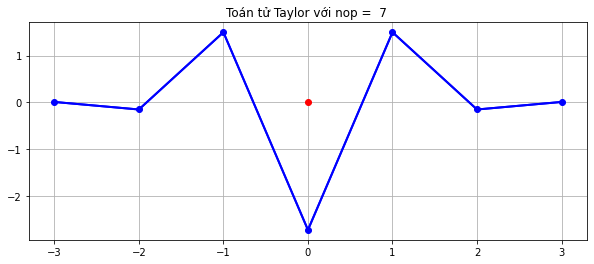

In [13]:
x = np.linspace(-(nop - 1) / 2, (nop - 1) / 2, nop)
plt.figure(figsize=(10, 4))
plt.plot(x, oper,lw=2,color='blue')
plt.plot(x, oper,lw=2,marker='o',color='blue')
plt.plot(0, 0,lw=2,marker='o',color='red')
plt.title("Toán tử Taylor với nop =  %i " % nop )
plt.grid()
plt.show()

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

Bài 2:

In [15]:
#Khởi tạo lưới
print("Nhập số điểm chia theo phương x, y: ")
nx = int(input())          # số điểm chia theo phương x
ny = nx          # số điểm chia theo phương x
dx = np.pi / (nx - 1) 
dy = dx
print("Nhập số điểm chia thời gian trong khoảng [0,1]: ")
nt = int(input())
dt = 1/(nt - 1)
op = 3

p = np.zeros((nx, ny))
pold = np.zeros((nx, ny))
pnew = np.zeros((nx, ny))
pxx = np.zeros((nx, ny))
pyy = np.zeros((nx, ny))

src = np.zeros((nx, ny))
pexact = np.zeros((nx, ny))
pexactnew = np.zeros((nx, ny))
pexactold = np.zeros((nx, ny))



err = np.zeros((nx, ny))
er = np.zeros(nt)

amp = np.zeros(nt)

Nhập số điểm chia theo phương x, y: 
1000
Nhập số điểm chia thời gian trong khoảng [0,1]: 
200000


In [16]:
# vận tốc truyền sóng
c = np.zeros((nx, ny))
for i in range(1, nx - 1):
    for j in range(1, ny - 1):
        c[i, j] = np.sqrt(1 + (i*dx) ** 2 / np.pi ** 2 + (j * dy) ** 2 / np.pi ** 2)

cmax = c.max()

In [ ]:
for it in range(nt):
    
    for i in range(1, nx - 1): 
        for j in range(1, ny - 1):
            #Nguồn
            src[i,j]  = (1 + 2 * (i*dx / np.pi) ** 2 + 2 * (j*dx / np.pi) ** 2 ) * math.cos(it * dt) * math.sin(i * dx) * math.sin(j * dy)
            #Nghiệm chính xác
            pexact[i, j] = math.cos(it * dt) * math.sin(i * dx) * math.sin(j * dy) 
    
    #Tính p bằng pp sai phân
    if op==3:
        for i in range(1, nx - 1):
            pyy[:, i] = p[:, i + 1] - 2 * p[:, i] + p[:, i - 1]
        for j in range(1, ny - 1):
            pxx[j, :] = p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]

    if op==5:
        for i in range(2, nx - 2):
            pyy[:, i] = -1./12*p[:,i+2]+4./3*p[:,i+1]-5./2*p[:,i]+4./3*p[:,i-1]-1./12*p[:,i-2]
        for j in range(2, ny - 2):
            pxx[j, :] = -1./12*p[j+2,:]+4./3*p[j+1,:]-5./2*p[j,:]+4./3*p[j-1,:]-1./12*p[j-2,:]
                             
    pxx /= dx ** 2
    pyy /= dx ** 2

    pnew = 2 * p - pold + dt ** 2 * c ** 2 * (pxx + pyy) + src
    
    pold, p = p, pnew
    
    #Sai số giữa nghiệm tính bằng pp sai phân và nghiệm chính xác
    err = abs(pexact - p)
    er[it] = err.max()
    #amp[it] = abs(p.max())
    amp[it] = abs(p.max())

In [ ]:
#print(er.max())
#time = np.arange(nt) * dt
#plt.ioff()
#plt.figure(figsize=(8, 8))
#plt.plot(time, er)
#plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

Bài 4:

In [ ]:
#Khởi tạo lưới
nx = 401     
ny = nx      
nt = 1160    
dx = 12.5     
dy = dx
dt = 0.001 

#Vị trí nguồn
isx = 201 
isy = 161 

ist = 100     
fp = 10.0     
isnap = 10    
dr = 0.5/fp
nop = 5       

p = np.zeros((ny, nx))
pold = np.zeros((ny, nx))
pnew = np.zeros((ny, nx))
pxx = np.zeros((ny, nx))
pyy = np.zeros((ny, nx))

amp03 = np.zeros(nx)
amp065 = np.zeros(nx)
amp095 = np.zeros(nx)
amp115 = np.zeros(nx)

In [ ]:
# vận tốc sóng
c0 = 1500.0   
c  = np.zeros((ny, nx)) 
c += c0
c[ny // 2:,:] *= 2

cmax = c.max()

#Nguồn
src = np.empty(nt + 1)
time = np.arange(nt) * dt
src = (1 - 2 * np.pi ** 2 * fp ** 2 * (time - dr) ** 2) * np.exp(-1 * np.pi ** 2 * fp ** 2 * (time - dr) ** 2)

<IPython.core.display.Javascript object>


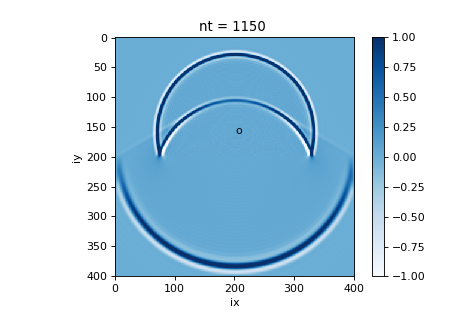

Courant Criterion eps :
0.24


In [60]:
#Mô phỏng sóng
v = max([np.abs(src.min()), np.abs(src.max())])

image = plt.imshow(p, interpolation='nearest', animated=True, vmin=-v, vmax=+v, cmap="Blues")      

plt.text(isx, isy, 'o')
plt.colorbar()
plt.xlabel('ix')
plt.ylabel('iy')

plt.ion()

print("Courant Criterion eps :")
print(cmax*dt/dx)

In [61]:
# Tính p bằng phương pháp sai phân hữu hạn
for it in range(nt):
    if nop==3:
        # calculate partial derivatives, be careful around the boundaries
        for i in range(1, nx - 1):
            pyy[:, i] = p[:, i + 1] - 2 * p[:, i] + p[:, i - 1]
        for j in range(1, ny - 1):
            pxx[j, :] = p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]

    if nop==5:
        # calculate partial derivatives, be careful around the boundaries
        for i in range(2, nx - 2):
            pyy[:, i] = -1./12*p[:,i+2]+4./3*p[:,i+1]-5./2*p[:,i]+4./3*p[:,i-1]-1./12*p[:,i-2]
        for j in range(2, ny - 2):
            pxx[j, :] = -1./12*p[j+2,:]+4./3*p[j+1,:]-5./2*p[j,:]+4./3*p[j-1,:]-1./12*p[j-2,:]
                    
            
    pxx /= dx ** 2
    pyy /= dy ** 2

    
    pnew = 2 * p - pold + dt ** 2 * c ** 2 * (pxx + pyy)

    pnew[isy, isx] = pnew[isy, isx] + src[it]
    
    if it % isnap == 0: 
        plt.title("nt = %d " %it)
        image.set_data(pnew)
        plt.gcf().canvas.draw()

    pold, p = p, pnew
    
    if it == 300:
        for i in range(1, ny - 1):
            amp03[i] = p[i, 201]
            
    if it == 650:
        for i in range(1, ny - 1):
            amp065[i] = p[i, 201]
    
    if it == 950:
        for i in range(1, ny - 1):
            amp095[i] = p[i, 201]
    
    if it == 1150:
        for i in range(1, ny - 1):
            amp115[i] = p[i, 201]

<IPython.core.display.Javascript object>


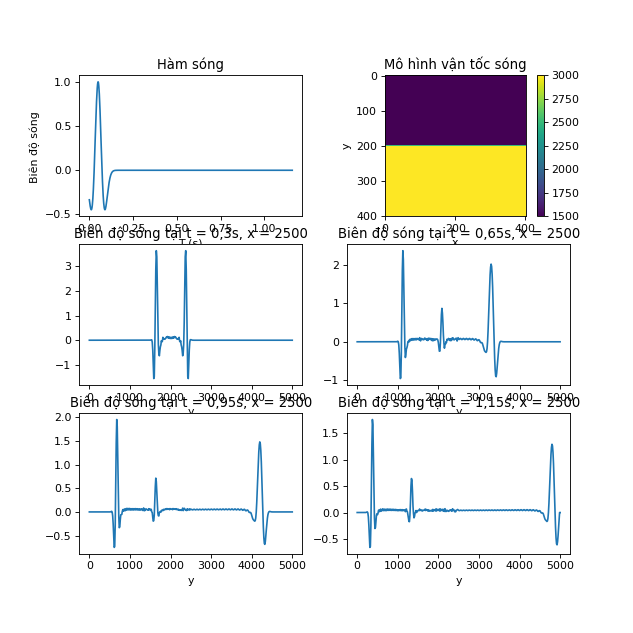

In [62]:
plt.ioff()
plt.figure(figsize=(8, 8))

plt.subplot(321)
plt.plot(time, src)
plt.title('Hàm sóng')
plt.xlabel('T (s)')
plt.ylabel('Biên độ sóng ')

plt.subplot(322)
plt.title('Mô hình vận tốc sóng')
plt.imshow(c)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

#Ve bien do song
y    = np.arange(ny) * dy
plt.subplot(323)
plt.title('Biên độ sóng tại t = 0,3s, x = 2500')
plt.xlabel('y')
plt.plot(y, amp03)

plt.subplot(324)
plt.title('Biên độ sóng tại t = 0,65s, x = 2500')
plt.xlabel('y')
plt.plot(y, amp065)

plt.subplot(325)
plt.title('Biên độ sóng tại t = 0,95s, x = 2500')
plt.xlabel('y')
plt.plot(y, amp095)

plt.subplot(326)
plt.title('Biên độ sóng tại t = 1,15s, x = 2500')
plt.xlabel('y')
plt.plot(y, amp115)

plt.show()